In [8]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from stn import spatial_transformer_network as transformer
os.environ['CUDA_VISIBLE_DEVICES']='3'

/home/lhw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


img-over
begin---
Tensor("Cast_17/x:0", shape=(3, 1200, 1600, 3), dtype=float32) Tensor("spatial_transformer_0_3/add:0", shape=(3, 6), dtype=float32) (600, 800)


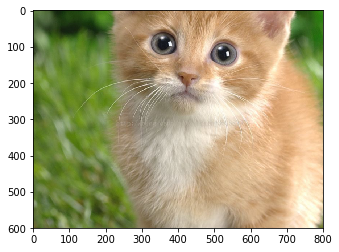

In [11]:
from scipy import ndimage
import cv2
im=ndimage.imread('./data/cat.jpg')
im=im/255.
#im=tf.reshape(im, [1,1200,1600,3])
 
im=im.reshape(1,1200,1600,3)
 
im=im.astype('float32')
print('img-over')
out_size=(600,800)
batch=np.append(im,im,axis=0)
batch=np.append(batch,im,axis=0)
num_batch=3
 
x=tf.placeholder(tf.float32,[None,1200,1600,3])
x=tf.cast(batch,'float32')
print('begin---')
with tf.variable_scope('spatial_transformer_0'):
    n_fc=6
    w_fc1=tf.Variable(tf.Variable(tf.zeros([1200*1600*3,n_fc]),name='W_fc1'))
    initial=np.array([[0.5,0,0],[0,0.5,0]])
    initial=initial.astype('float32')
    initial=initial.flatten()
    
    
    b_fc1=tf.Variable(initial_value=initial,name='b_fc1')
    
    
    h_fc1=tf.matmul(tf.zeros([num_batch,1200*1600*3]),w_fc1)+b_fc1
    
    print(x,h_fc1,out_size)
 
    h_trans=transformer(x,h_fc1,out_size)
 
    
sess=tf.Session()
sess.run(tf.global_variables_initializer())
y=sess.run(h_trans,feed_dict={x:batch})
plt.imshow(y[0])
plt.show()